In [1]:
from lppls import lppls_cmaes
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

In [2]:
date_range = pd.date_range(end=pd.Timestamp.today() - pd.Timedelta(days=30), 
                           start=pd.Timestamp.today() - pd.Timedelta(days=120), 
                           freq='D')

In [3]:
tk = 'NLR'

In [4]:
# Download S&P 500 historical data
df = yf.download(tk, start=date_range[0], progress=False)

YF.download() has changed argument auto_adjust default to True


(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=511650, Mon Mar 31 18:50:06 2025)


(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=556561, Mon Mar 31 18:50:15 2025)
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=508598, Mon Mar 31 18:50:15 2025)
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=578217, Mon Mar 31 18:50:15 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 1.352499023045126e-02 1.0e+00 9.43e-01  7e-02  2e+04 0:00.3
    2    320 1.343409731912617e-02 4.8e+00 8.50e-01  5e-02  5e+03 0:00.6
    3    480 1.334701222417068e-02 1.3e+01 8.20e-01  6e-02  3e+03 0:01.0
   10   1600 1.341608803360918e-02 2.6e+01 9.56e-01  7e-02  3e+03 0:04.2
   19   3040 1.072522700013467e-02 5.2e+01 1.46e+00  1e-01  3e+03 0:08.8
   31   4960 1.063921974442231e-02 8.8e+01 1.62e+00  6e-02  2e+03 0:14.4
   47   7520 1.045281529958940e-02 9.2e+02 2.71e+00  2e-02  2e+01 0:20.5
   67  10720 1.037468759096168e-02 6.5e+03 9.57e+00  2e-06  4e-04 0:27.7
   70  11200 1.037468759095829e-02 6.3e+03 8.22e+00  3e-07  4e-05

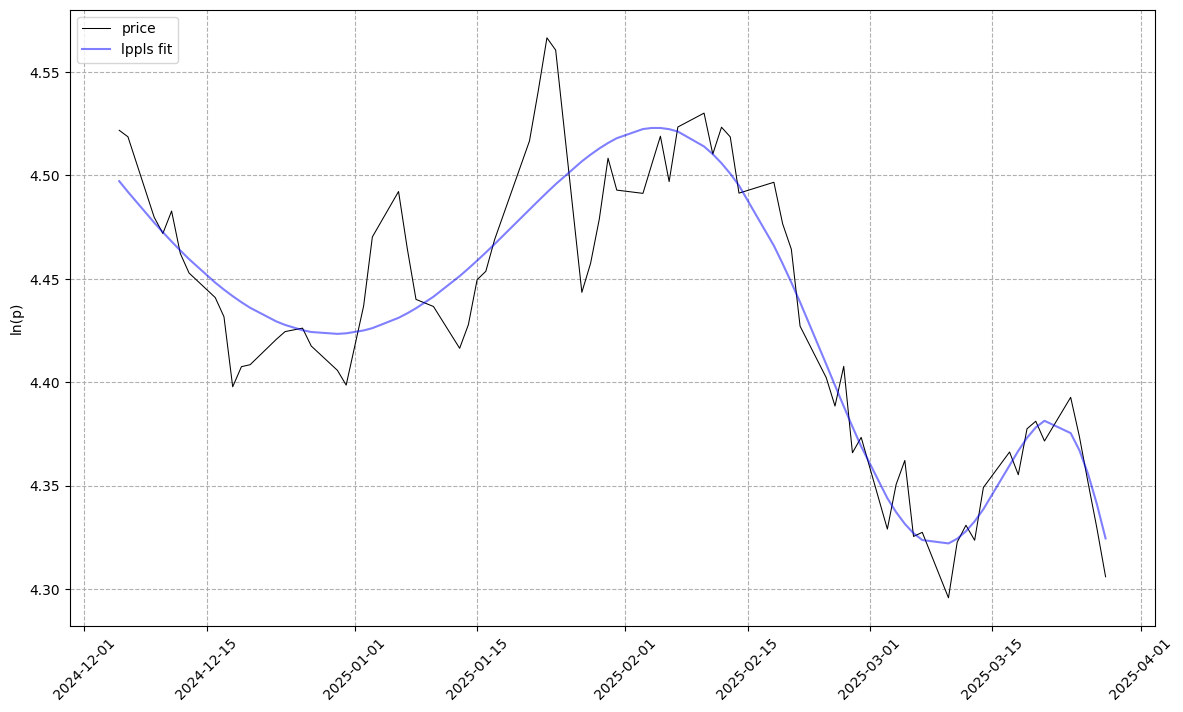

In [5]:
stop = False
for day in date_range:
    data = df.loc[day:]
    # convert time to ordinal
    time = np.array([pd.Timestamp.toordinal(t1) for t1 in data.index])

    # create list of observation data
    price = np.log(data['Close'].values).reshape(-1)

    # create observations array (expected format for LPPLS observations)
    observations = np.array([time, price])

    try:
        lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
        tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=5000, pop_size=4)
        
        stop = True
    except:
        pass

    if stop:
        break

# visualize the fit
lppls_model.plot_fit()
print(pd.Timestamp.fromordinal(int(tc)))
print(np.exp(a))

In [6]:
tk = 'MLPX'

In [7]:
# Download S&P 500 historical data
df = yf.download(tk, start=date_range[0], progress=False)

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=471970, Mon Mar 31 18:53:39 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 6.824032181956733e-03 1.0e+00 9.66e-01  8e-02  4e+04 0:00.2
    2    320 6.806649881804199e-03 2.0e+00 8.57e-01  7e-02  9e+03 0:00.3
    3    480 6.476535292117747e-03 7.4e+00 8.85e-01  7e-02  3e+03 0:00.4
   31   4960 6.150688486434533e-03 8.2e+02 3.42e+00  1e-01  2e+02 0:03.4
   55   8800 6.001577993597988e-03 3.4e+03 5.79e+00  3e-07  7e-05 0:05.7
2025-06-23 00:00:00
63.176751275481394


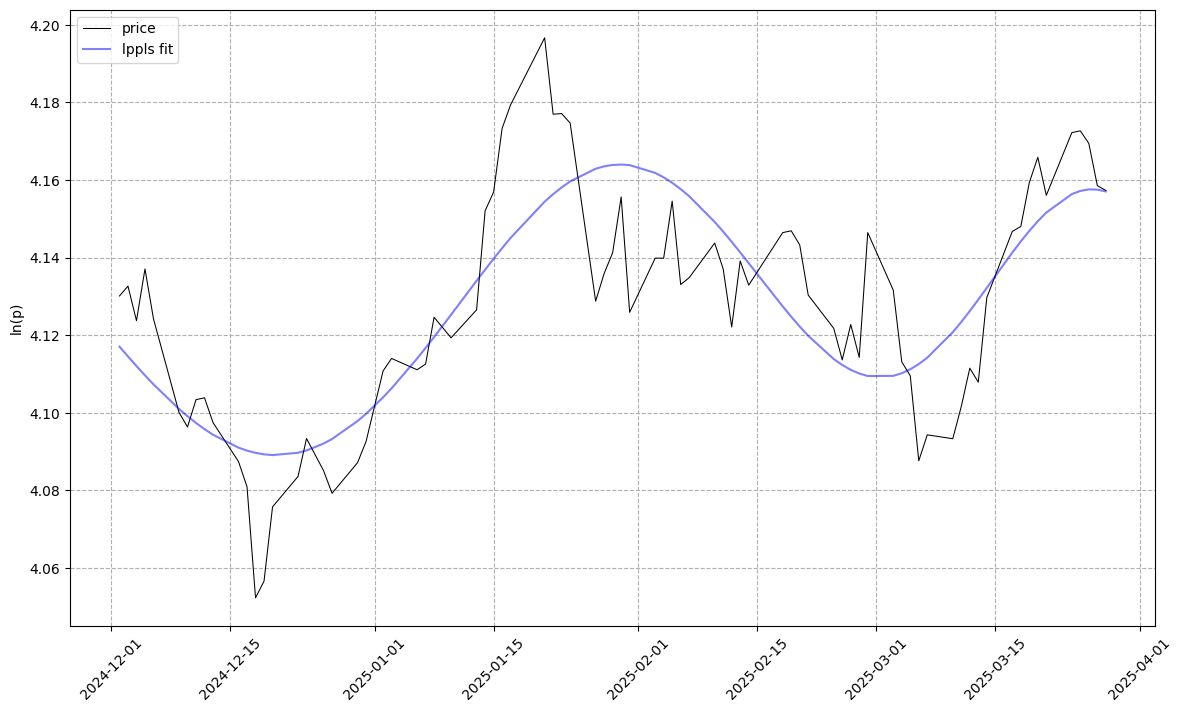

In [8]:
stop = False
for day in date_range:
    data = df.loc[day:]
    # convert time to ordinal
    time = np.array([pd.Timestamp.toordinal(t1) for t1 in data.index])

    # create list of observation data
    price = np.log(data['Close'].values).reshape(-1)

    # create observations array (expected format for LPPLS observations)
    observations = np.array([time, price])

    try:
        lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
        tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=5000, pop_size=4)
        
        stop = True
    except:
        pass

    if stop:
        break

# visualize the fit
lppls_model.plot_fit()
print(pd.Timestamp.fromordinal(int(tc)))
print(np.exp(a))

In [12]:
tk = 'GC=F'

In [13]:
# Download S&P 500 historical data
df = yf.download(tk, start=date_range[0], progress=False)

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=541598, Mon Mar 31 18:56:46 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 1.051934739543145e-03 1.0e+00 1.02e+00  9e-02  3e+04 0:00.1
    2    320 9.666991373288110e-04 3.8e+00 1.16e+00  1e-01  1e+04 0:00.2
    3    480 9.726154331595482e-04 1.0e+01 1.08e+00  1e-01  7e+03 0:00.3
   37   5920 8.171119936776913e-04 1.1e+03 1.20e+00  3e-07  4e-04 0:02.9
2025-04-06 00:00:00
3196.790280946029


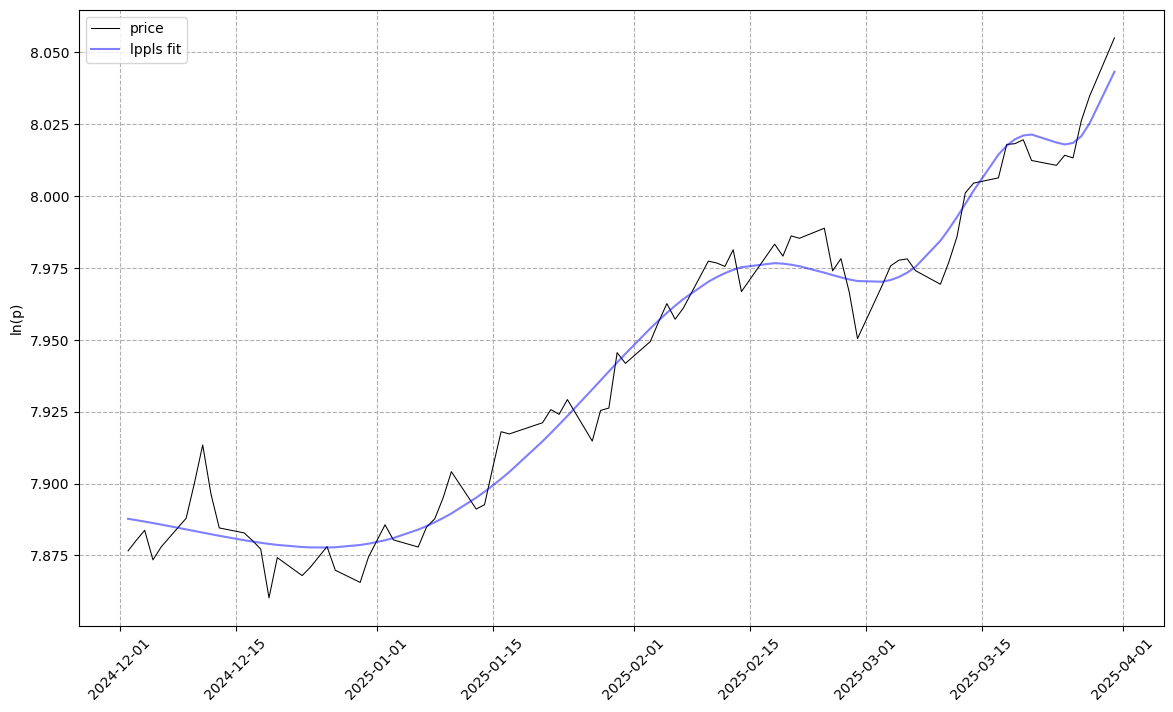

In [14]:
stop = False
for day in date_range:
    data = df.loc[day:]
    # convert time to ordinal
    time = np.array([pd.Timestamp.toordinal(t1) for t1 in data.index])

    # create list of observation data
    price = np.log(data['Close'].values).reshape(-1)

    # create observations array (expected format for LPPLS observations)
    observations = np.array([time, price])

    try:
        lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
        tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=5000, pop_size=4)
        
        stop = True
    except:
        pass

    if stop:
        break

# visualize the fit
lppls_model.plot_fit()
print(pd.Timestamp.fromordinal(int(tc)))
print(np.exp(a))